<a href="https://colab.research.google.com/github/fbeilstein/algorithms/blob/master/arrays_running_sum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Visualization code

str_style = '''
<style>
table {
  border-collapse: collapse;
}

td {
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #00000080;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
}

.border {
  border: 2px solid #d6d6d6ff;
}

.noborder {
  border: 0px;
}
</style>
'''

def enclose_element(element, color, txt_color, border=True):
  res  = '\t<td bgcolor="' + color + '" '
  res += 'class="border"' if border else 'class="noborder"'
  if txt_color: res += 'style="color:' + str(txt_color) + '" ';
  res += '>' + str(element) + '</td>'
  return res

def horizontal_tbl(array, colors, txt_colors, borders):
  result = '<table>\n'
  for row, c_row, tc_row, has_border in zip(array, colors, txt_colors, borders):
    result += '<tr>\n'
    for e, c, tc in zip(row, c_row, tc_row):
      result += enclose_element(e, c, tc, has_border) + '\n'
    result += '</tr>\n'
  result += '</table>\n'
  return result

def array_to_html(array, colors, txt_colors, borders):
  return str_style + horizontal_tbl(array, colors, txt_colors, borders)

def visualize_array(array, colors, txt_colors, borders):
  array_str = array_to_html(array, colors, txt_colors, borders)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(array_str))


##Minimum Value to Get Positive Step by Step Sum

In [ ]:
class Solution:
    def minStartValue(self, nums: List[int]) -> int:
        return max(1, 1 - min(itertools.accumulate(nums)))

In [ ]:
nums = [-3,2,-3,4,2]
import itertools
acum = list(itertools.accumulate(nums))

visualize_array([["original: "] + nums, ["accumulated: "] + acum], 
                [['#ffffff'] * len(nums)] * 2, 
                [['#000000'] * len(nums)] * 2, 
                [True, True])

original:,-3,2,-3,4
accumulated:,-3,-1,-4,0


## Range Addition II

* Note that all rectangles start at $(0;0)$


![](https://assets.leetcode.com/users/images/a145b4a4-dbe1-4ae5-9a19-b52b726192fe_1601893617.3024125.png)

In [ ]:
class Solution:
    def maxCount(self, m: int, n: int, ops: List[List[int]]) -> int:
        xy = reduce(lambda x,y: [min(x[0],y[0]), min(x[1], y[1])], ops, [m,n])
        return xy[0]*xy[1]

In [ ]:
m = 7
n = 7
ops = [[5,2],[3,3],[3,3],[3,3],[2,2],[3,3],[3,3],[3,3],[2,2],[3,3],[3,3],[3,3]]

xs = [e[0] for e in ops]
ys = [e[1] for e in ops]
mx = list(itertools.accumulate([m] + xs, min))
my = list(itertools.accumulate([n] + ys, min))
visualize_array([["input x: ", ""] + xs, 
                 ["input y: ", ""] + ys,
                 ["min x:"] + mx, ["min y:"] + my], 
                [['#ffffff'] * (len(mx)+1)] * 4, 
                [['#000000'] * (len(mx)+1)] * 4, 
                [True, True, True, True])

input x:,,5,3,3,3,2,3,3,3,2,3,3,3
input y:,,2,3,3,3,2,3,3,3,2,3,3,3
min x:,7,5,3,3,3,2,2,2,2,2,2,2,2
min y:,7,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
result = [[0 for _ in range(n)] for _ in range(m)]
for xm, ym in ops:
  for y in range(ym):
    for x in range(xm):
      result[y][x] += 1
  print("íteration:", xm ,ym)
  visualize_array(result, 
                [['#ffffff'] * m] * n, 
                [['#000000'] * m] * n, 
                [True] * n)

íteration: 5 2


1,1,1,1,1,0,0
1,1,1,1,1,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


2,2,2,1,1,0,0
2,2,2,1,1,0,0
1,1,1,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


3,3,3,1,1,0,0
3,3,3,1,1,0,0
2,2,2,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


4,4,4,1,1,0,0
4,4,4,1,1,0,0
3,3,3,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 2 2


5,5,4,1,1,0,0
5,5,4,1,1,0,0
3,3,3,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


6,6,5,1,1,0,0
6,6,5,1,1,0,0
4,4,4,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


7,7,6,1,1,0,0
7,7,6,1,1,0,0
5,5,5,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


8,8,7,1,1,0,0
8,8,7,1,1,0,0
6,6,6,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 2 2


9,9,7,1,1,0,0
9,9,7,1,1,0,0
6,6,6,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


10,10,8,1,1,0,0
10,10,8,1,1,0,0
7,7,7,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


11,11,9,1,1,0,0
11,11,9,1,1,0,0
8,8,8,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


íteration: 3 3


12,12,10,1,1,0,0
12,12,10,1,1,0,0
9,9,9,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,0,0,0


## Move Zeroes

In [ ]:
class Solution:
    def moveZeroes(self, nums: List[int]) -> None:
        idx_1, idx_2 = 0, 0
        while idx_2 < len(nums):
            nums[idx_1] = nums[idx_2]
            idx_2 += 1
            idx_1 += (nums[idx_1] != 0)
        while idx_1 < len(nums):
            nums[idx_1] = 0
            idx_1 += 1

In [ ]:
nums = [0,1,0,3,12]


def show_ptrs(idx_1, idx_2):
  arr = [nums + [""], [""]*(1+len(nums))]
  arr[1][idx_1] += '<b style="color:green">↑</b>'
  arr[1][idx_2] += '<b style="color:red">↑</b>'
  cols = [['#00aa00']*(idx_1) + ['#ffffff'] * (len(arr[0])-idx_1), ['#ffffff'] * len(arr[0])]
  visualize_array(arr, cols, 
                [['#000000'] * len(arr[0])] * 2, 
                [True, False])

idx_1, idx_2 = 0, 0
while idx_2 < len(nums):
  show_ptrs(idx_1, idx_2)
  nums[idx_1] = nums[idx_2]
  idx_2 += 1
  idx_1 += (nums[idx_1] != 0)
show_ptrs(idx_1, idx_2)
print("First while complete")
while idx_1 < len(nums):
  show_ptrs(idx_1, idx_2)
  nums[idx_1] = 0
  idx_1 += 1
show_ptrs(idx_1, idx_2)

0,1,0,3,12,
↑↑,,,,,


0,1,0,3,12,
↑,↑,,,,


1,1,0,3,12,
,↑,↑,,,


1,0,0,3,12,
,↑,,↑,,


1,3,0,3,12,
,,↑,,↑,


1,3,12,3,12,
,,,↑,,↑


First while complete


1,3,12,3,12,
,,,↑,,↑


1,3,12,0,12,
,,,,↑,↑


1,3,12,0,0,
,,,,,↑↑


## Rotate Image

In [ ]:
class Solution:
    def rotate(self, matrix: List[List[int]]) -> None:
        a = len(matrix) - 1
        for x_idx in range((1+a)//2):
            for y_idx in range(1+a//2):
                (matrix[y_idx][x_idx], 
                 matrix[a - x_idx][y_idx],
                 matrix[a - y_idx][a - x_idx],
                 matrix[x_idx][a - y_idx]) = (matrix[a - x_idx][y_idx], 
                                              matrix[a - y_idx][a - x_idx],
                                              matrix[x_idx][a - y_idx],
                                              matrix[y_idx][x_idx])        

In [ ]:
matrix = [[1,2,3],[4,5,6],[7,8,9]]

def show_m(x_idx, y_idx):
  a = len(matrix) - 1
  arr_s = [[str(e) for e in row] for row in matrix]
  arr_s[y_idx][x_idx] += '<sup><b style="color:red">1</b></sup>'
  arr_s[a - x_idx][y_idx] += '<sup><b style="color:red">2</b></sup>'
  arr_s[a - y_idx][a - x_idx] += '<sup><b style="color:red">3</b></sup>'
  arr_s[x_idx][a - y_idx] += '<sup><b style="color:red">4</b></sup>'
  visualize_array(arr_s, [['#ffffff'] * (a+1)] * (a+1), [['#000000'] * (a+1)] * (a+1), [True] * (a+1))

a = len(matrix) - 1
for x_idx in range((1+a)//2):
  for y_idx in range(1+a//2):
    show_m(x_idx, y_idx)
    print('------')
    (matrix[y_idx][x_idx], 
     matrix[a - x_idx][y_idx],
     matrix[a - y_idx][a - x_idx],
     matrix[x_idx][a - y_idx]) = (matrix[a - x_idx][y_idx], 
                                  matrix[a - y_idx][a - x_idx],
                                  matrix[x_idx][a - y_idx],
                                  matrix[y_idx][x_idx])
    show_m(x_idx, y_idx)
    print('------') 

11,2,34
4,5,6
72,8,93


------


71,2,14
4,5,6
92,8,33


------


7,24,1
41,5,63
9,82,3


------


7,44,1
81,5,23
9,62,3


------


## N-Repeated Element in Size 2N Array

In [ ]:
class Solution:
    def repeatedNTimes(self, nums: List[int]) -> int:
      if nums[0] == nums[2]: return nums[0];
      if nums[1] == nums[3]: return nums[1];
      for i in range(len(nums)-1):
        if nums[i] == nums[i+1]: return nums[i];
        

* consider that there are many similar elements. if two neighbouring elements are equal -- we foud what we search

In [ ]:

visualize_array([[" "] * 6], 
                [['#ffffff','#00aa00','#00aa00','#ffffff','#ffffff','#00aa00']], 
                [['#000000'] * 6], 
                [True])

,,,,,


* consider situations whitout any equal neighbouring elements. see that every pair should have one dedicated element. consider all cases.

In [ ]:
visualize_array([[" "] * 6], 
                [['#ffffff','#00aa00','#ffffff','#00aa00','#ffffff','#00aa00']], 
                [['#000000'] * 6], 
                [True])
print('----')
visualize_array([[" "] * 6], 
                [['#00aa00','#ffffff','#00aa00','#ffffff','#00aa00','#ffffff']], 
                [['#000000'] * 6], 
                [True])
print('----')
visualize_array([[" "] * 6], 
                [['#00aa00','#ffffff','#ffffff','#00aa00','#ffffff','#00aa00']], 
                [['#000000'] * 6], 
                [True])
print('----')
visualize_array([[" "] * 6], 
                [['#00aa00','#ffffff','#00aa00','#ffffff','#ffffff','#00aa00']], 
                [['#000000'] * 6], 
                [True])

,,,,,


----


,,,,,


----


,,,,,


----


,,,,,


## Product of Array Except Self

In [ ]:
class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        out = [1] * n
        for idx in range(n-1):
            out[idx+1] = out[idx] * nums[idx]
        tmp = 1
        for idx in range(n-1, 0, -1):
            tmp *= nums[idx]
            out[idx-1] = out[idx-1] * tmp        
        return out
        

![](https://assets.leetcode.com/users/images/112a37de-e43d-44a0-a39b-0035a9b3d162_1613386193.5577152.png)

## Find the Duplicate Number

In [ ]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        hare = nums[nums[0]]
        tortoise = nums[0]
        while hare != tortoise:
            tortoise = nums[tortoise]
            hare = nums[nums[hare]]
        tortoise2 = 0
        while tortoise != tortoise2:
            tortoise = nums[tortoise]
            tortoise2 = nums[tortoise2]
        return tortoise

* IDEA: interpret numbers as references to another cell
* understand that there can be cycles or cycles with tails
* show that there can be only one cycle with one tail (use that there is only one repeating number)
* show that 0 should be in that unique tail (there is no 0 element in array, thus no one references it)

![](https://assets.leetcode.com/users/images/206790c6-9ef4-41c5-9bc5-9c130c504705_1631776692.9967043.png)

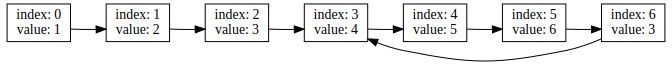

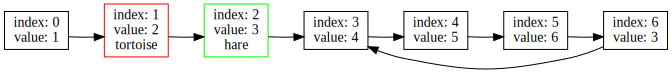

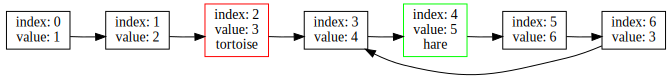

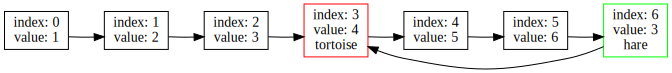

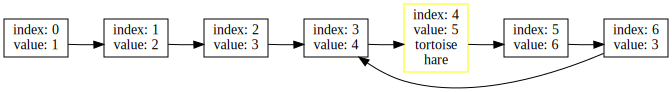

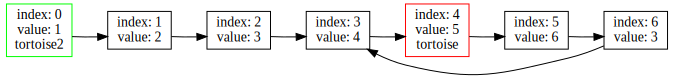

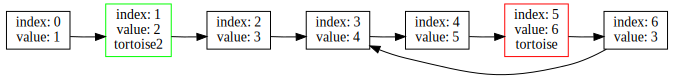

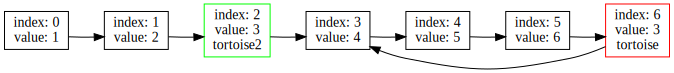

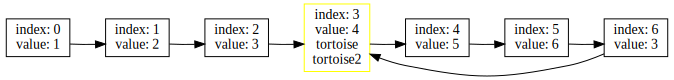

In [ ]:
nums = [1, 2, 3, 4, 5, 6, 3] #[1, 2, 3, 4, 2, 6, 7, 5]


from graphviz import Digraph
import pydotplus
from IPython.display import SVG

def plot_graph(ptr1, ptr2, name1, name2):
  dot = Digraph(graph_attr={'rankdir':'LR'}, 
                node_attr={'shape': 'box'})
  for idx, val in enumerate(nums):
    node_name = 'index: ' + str(idx) + '\\nvalue: ' + str(val)
    color = 'black'
    if idx == ptr1:
      node_name += '\\n' + name1
      color = 'red'
    if idx == ptr2:
      node_name += '\\n' + name2
      color = 'green'
    if idx == ptr1 and idx == ptr2:
      color = 'yellow'
    dot.node(str(idx), label=node_name, group='main', color=color)
    dot.edge(str(idx), str(val))
    if idx < len(nums) -1:
      dot.edge(str(idx), str(idx+1), style='invis')

  graph = pydotplus.graph_from_dot_data(dot.source)
  display(SVG(graph.create_svg()))

plot_graph(-1, -1, 'tortoise', 'hare')
hare = nums[nums[0]]
tortoise = nums[0]
plot_graph(tortoise, hare, 'tortoise', 'hare')
while hare != tortoise:
  tortoise = nums[tortoise]
  hare = nums[nums[hare]]
  plot_graph(tortoise, hare, 'tortoise', 'hare')
tortoise2 = 0
plot_graph(tortoise, tortoise2, 'tortoise', 'tortoise2')
while tortoise != tortoise2:
  tortoise = nums[tortoise]
  tortoise2 = nums[tortoise2]
  plot_graph(tortoise, tortoise2, 'tortoise', 'tortoise2')